In [1]:
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import statsmodels.api as sn
from scipy.stats import kurtosis,skew
#sns.histplot,sns.heatmap for corr,plt.scatter
#sns.regplot(x='proline', y='alcohol', data=df1) - regression line
#sns.jointplot(x='proline', y='alcohol', data=df1,kind='kde') - тоже самое что и plt.scatter только есть параметр kind
#sns.pairplot(df) - строит все возможные графики наших переменных в выборке
#sns.barplot(df['Education']) отображает все элементы и их значение в виде столбцов
#sns.barplot(data=df,y='nonflavanoid_phenols',x='class_label') - строит столбчатую диаграмму для каждой группы в количественной
#переменной class_label высчитывая среднее значение nonflavanoid_phenols 
#sns.catplot(data=df,x='class_label',y='alcohol') #помогает посмотреть распределение alcohol в зависимости от class_label



In [2]:
df=pd.read_csv('wine_data.csv')
df.head(2)

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [3]:
df.describe()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


0.8095429145285168

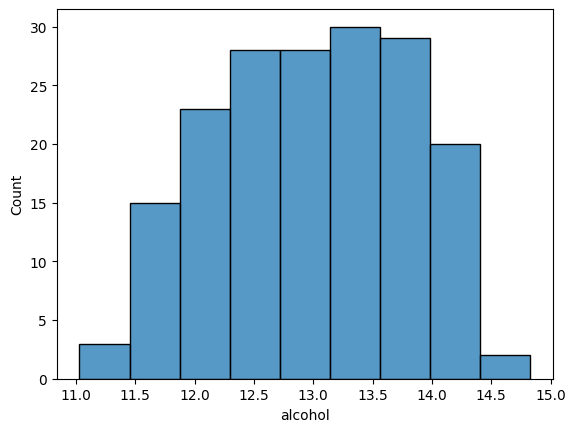

In [4]:
sns.histplot(data=df,x='alcohol')
np.std(df['alcohol'])

In [5]:
(df['alcohol']*10).kurtosis()
df['alcohol'].skew() #ladno.

-0.051482331077134784

In [6]:
print(df['alcohol'].nunique(),
df['alcohol'].unique(),sep='\n')

126
[14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]


In [7]:
a,b=np.unique(df['alcohol'],return_counts=True)
for i,k in zip(a,b):
    print(i,': ',k)
    break

11.03 :  1


In [8]:
for c in df.columns:
    print(c,': ',df[c].nunique())

class_label :  3
alcohol :  126
malic_acid :  133
ash :  79
alcalinity_of_ash :  63
magnesium :  53
total_phenols :  97
flavanoids :  132
nonflavanoid_phenols :  39
proanthocyanins :  101
color_intensity :  132
hue :  78
OD280/OD315_of_diluted_wines :  122
proline :  121


<Axes: xlabel='ash', ylabel='Count'>

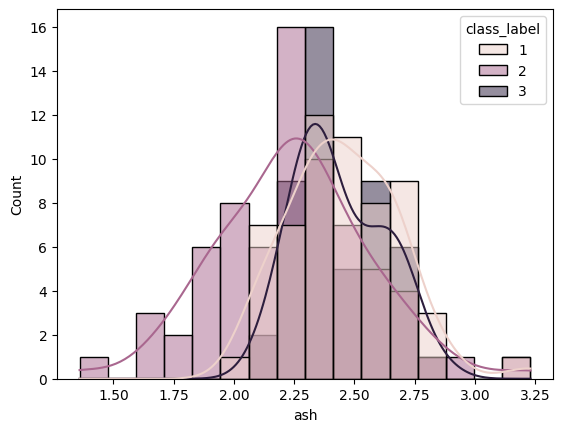

In [9]:
sns.histplot(data=df,x='ash',kde='True',hue='class_label');
sns.histplot()


In [10]:
df.head(2)

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [11]:

#sns.heatmap(df[df.columns].corr(), annot=True, cmap='coolwarm')



df_corr=pd.DataFrame(df.corr())

In [12]:
df_corr

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
class_label,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [13]:
a=None
for index, row in df_corr.iterrows():
    print(abs(df_corr[index]).sum()-1)
    a=row

a=row    
print('\n\n\n',a['proline'])

6.4025628834236485
3.3679148869719446
3.6701930451331286
2.1562180058103753
3.885079340177679
2.5220951426123093
5.621719432134858
6.209949839124486
4.312493413072628
4.101221234146947
3.197137362281505
4.51324112231617
5.392491188817788
5.0261759614782555



 1.0


<Axes: >

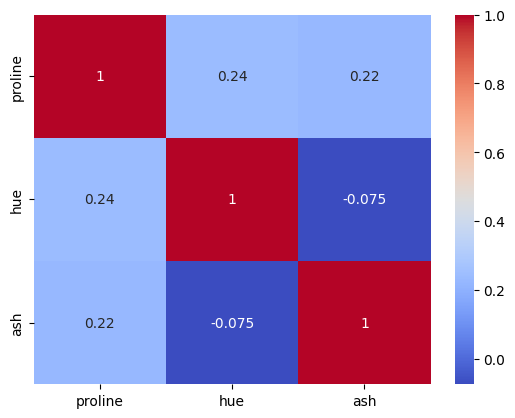

In [14]:

sns.heatmap(df[['proline','hue','ash']].corr(),annot=True,cmap='coolwarm')

In [15]:
stats.pearsonr(df['ash'],df['proline'])

PearsonRResult(statistic=0.22362626368757224, pvalue=0.002694294961624183)

In [16]:
df['ash'].mean(), df['proline'].mean()

(2.3665168539325845, 746.8932584269663)

In [17]:
stats.pearsonr(df['ash'],df['hue'])


PearsonRResult(statistic=-0.07466688903277302, pvalue=0.32190746979668383)

In [18]:
stats.pearsonr(df['total_phenols'],df['flavanoids'])


PearsonRResult(statistic=0.864563500095115, pvalue=1.7558389525863504e-54)

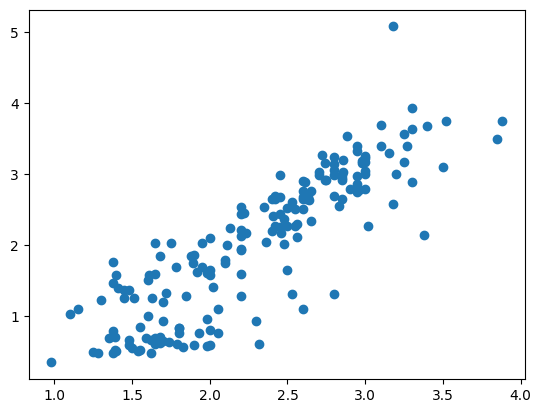

In [19]:
plt.scatter(df['total_phenols'],df['flavanoids'])
plt.show()

In [20]:
df1=df[df['class_label']==1]
df2=df[df['class_label']==2]
df3=df[df['class_label']==3]


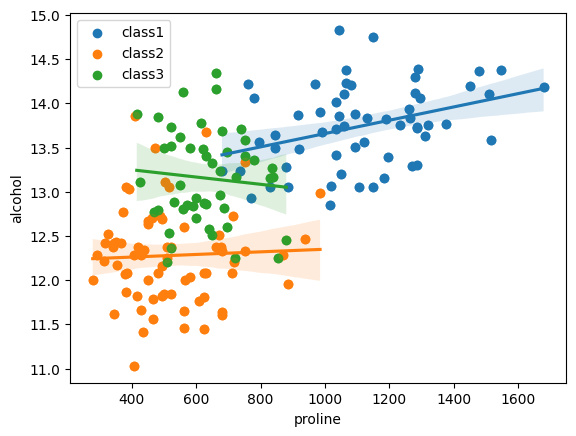

In [21]:
plt.scatter(df1['proline'],df1['alcohol'],label='class1')
plt.scatter(df2['proline'],df2['alcohol'],label='class2')
plt.scatter(df3['proline'],df3['alcohol'],label='class3')
plt.legend()

sns.regplot(x='proline', y='alcohol', data=df1)
sns.regplot(x='proline', y='alcohol', data=df2)
sns.regplot(x='proline', y='alcohol', data=df3)

plt.show()


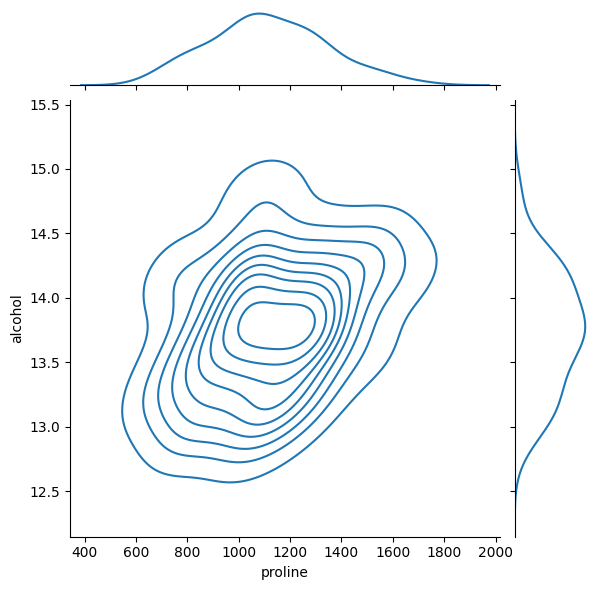

In [22]:

sns.jointplot(x='proline', y='alcohol', data=df1,kind='kde')#тоже самое только есть параметр kind


In [23]:
for i in df.columns:
    print(i,': ', df[i].isnull().sum())

class_label :  0
alcohol :  0
malic_acid :  0
ash :  0
alcalinity_of_ash :  0
magnesium :  0
total_phenols :  0
flavanoids :  0
nonflavanoid_phenols :  0
proanthocyanins :  0
color_intensity :  0
hue :  0
OD280/OD315_of_diluted_wines :  0
proline :  0


c:\Users\vladt\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


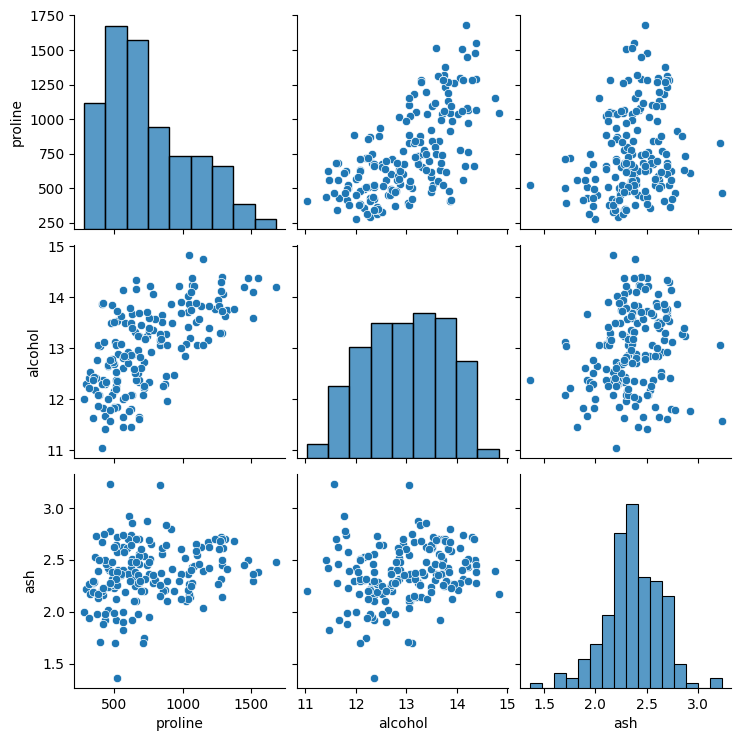

In [24]:
sns.pairplot(df[['proline','alcohol','ash']])

In [28]:
#sns.barplot(data=df,y='nonflavanoid_phenols',x='class_label')
df.head(2)

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


c:\Users\vladt\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


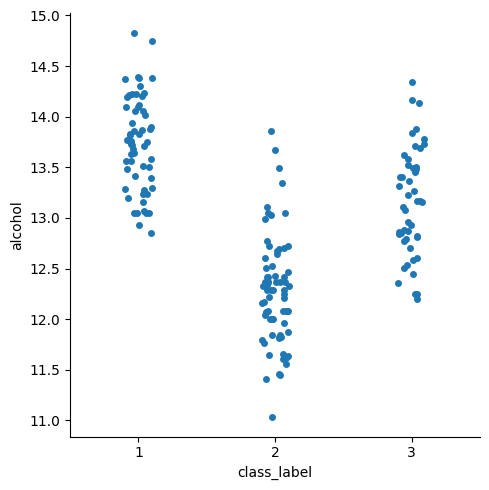

In [29]:
sns.catplot(data=df,x='class_label',y='alcohol') #посмотреть потом это

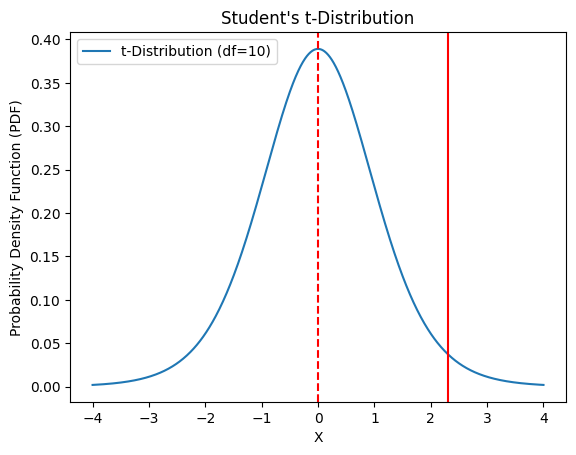

In [ ]:
from scipy.stats import t

# Задаем число степеней свободы
df = 10


# Создаем массив значений
x = np.linspace(-4, 4, 1000)


# Плотность вероятности для распределения t
pdf = t.pdf(x, df)

# Строим график
plt.plot(x, pdf, label=f't-Distribution (df={df})')
plt.axvline(x=np.mean(x), color='r', linestyle='--',)
plt.axvline(x=np.std(x), color='r', )

plt.title('Student\'s t-Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:

df=pd.read_csv('wine_data.csv')
print(df.columns)
X=df


Index(['class_label', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280/OD315_of_diluted_wines', 'proline'],
      dtype='object')


In [ ]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data["Tolerance"] = 1 / vif_data["VIF"]

print("VIF и Tolerance:")
print(vif_data)

VIF и Tolerance:
                        Variable         VIF  Tolerance
0                    class_label   48.874851   0.020460
1                        alcohol  252.682552   0.003958
2                     malic_acid    8.959741   0.111610
3                            ash  166.683456   0.005999
4              alcalinity_of_ash   89.355693   0.011191
5                      magnesium   68.217620   0.014659
6                  total_phenols   64.707921   0.015454
7                     flavanoids   46.364913   0.021568
8           nonflavanoid_phenols   16.636839   0.060108
9                proanthocyanins   17.352110   0.057630
10               color_intensity   18.034759   0.055448
11                           hue   45.524508   0.021966
12  OD280/OD315_of_diluted_wines   58.334708   0.017142
13                       proline   24.202727   0.041318
